In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2a-data"

# **UE22CS342AA2- Data Analytics - Worksheet 2a - Simple Linear and Multiple Linear Regression**

Sanjana S - sanjanasuresh2709@gmail.com

**Academic Excellence Analysis Task**

In today's competitive educational landscape, understanding the factors that contribute to student success is more important than ever. Educators and policymakers are constantly seeking ways to enhance learning outcomes and support students in achieving their full potential. By analyzing various elements that influence academic performance, we can uncover valuable insights and develop effective strategies to improve educational practices.

Your task is to analyze the dataset to uncover the factors influencing academic success. By examining various predictors and their impact on the performance index, you can provide valuable insights that can help educators and students optimize learning strategies.

## Regression

Regression is a statistical method used to model the connection between variables, understanding how changes in one influence another. It's vital for predicting outcomes, finding patterns, and making informed decisions. 

In this worksheet we will be exploring 2 concepts. Namely:

  - Simple Linear Regression
  
  - Multiple Linear Regression
  
 

Before we go any further, let's have a look at the dataset and it's different columns

**Data Dictionary**

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Learning Hours: The total number of hours spent studying by each student.
* Previous Exam Scores: The scores obtained by students in previous exams.
* Club Participation: Whether the student participates in any club activities (Yes or No).
* Daily Rest Hours: The average number of hours of sleep the student had per day.
* Practice Tests Taken: The number of sample question papers the student practiced.

Target Variable:
* Academic Performance Index: A measure of the overall performance of each student.It represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


## Data Visualising

Let's visualize this all in the form of a Data Frame

In [2]:
data <- read.csv("/kaggle/input/2a-data/2a-data.csv")
head(data)

,Learning_Hours,Previous_Exam_Scores,Club_Participation,Daily_Rest_Hours,Practice_Tests_Taken,Academic_Performance_Score
,<int>,<int>,<chr>,<int>,<int>,<int>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [3]:
summary(data)

 Learning_Hours  Previous_Exam_Scores Club_Participation Daily_Rest_Hours
 Min.   :1.000   Min.   :40.00        Length:10000       Min.   :4.000   
 1st Qu.:3.000   1st Qu.:54.00        Class :character   1st Qu.:5.000   
 Median :5.000   Median :69.00        Mode  :character   Median :7.000   
 Mean   :4.993   Mean   :69.45                           Mean   :6.531   
 3rd Qu.:7.000   3rd Qu.:85.00                           3rd Qu.:8.000   
 Max.   :9.000   Max.   :99.00                           Max.   :9.000   
 Practice_Tests_Taken Academic_Performance_Score
 Min.   :0.000        Min.   : 10.00            
 1st Qu.:2.000        1st Qu.: 40.00            
 Median :5.000        Median : 55.00            
 Mean   :4.583        Mean   : 55.22            
 3rd Qu.:7.000        3rd Qu.: 71.00            
 Max.   :9.000        Max.   :100.00            

## Regression Analysis


### 1. Simple Linear Regression

Educators want to know if previous academic performance is often a strong indicator of future academic success.<br> <br>
**a)** Create a scatter plot between the dependent variable-Previous_Exam_Score and independent variable-Academic_Performance_Score with the best-fit line passing through.            (1 mark)

`geom_smooth()` using formula = 'y ~ x'


List of 136
 $ line                            :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                            :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                            :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: l

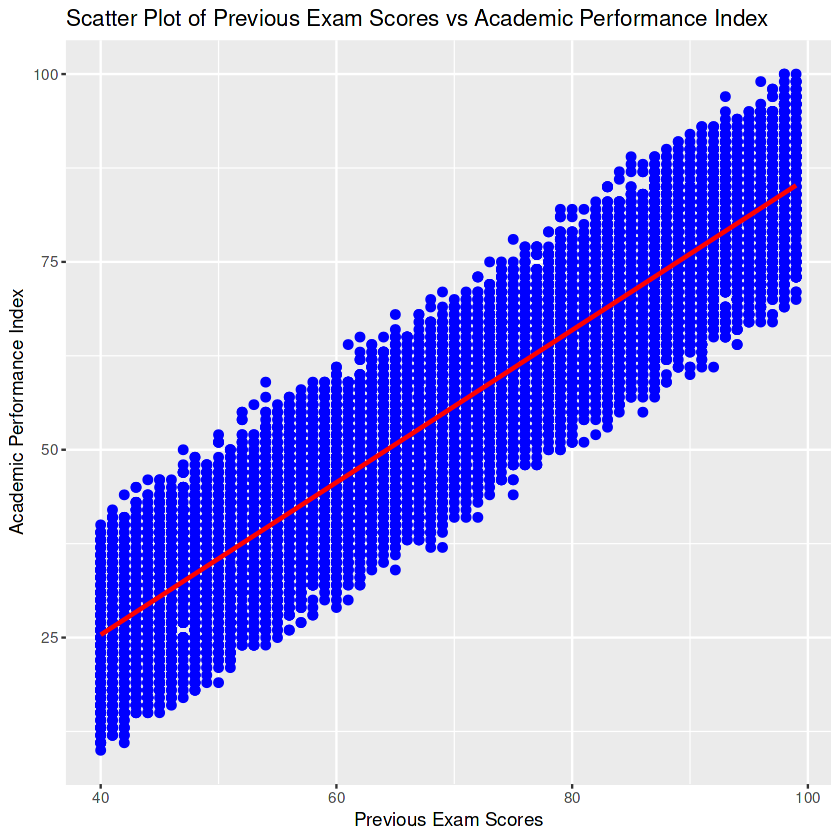

In [4]:
#Write your code here

library(ggplot2)
ggplot(data, aes(x=Previous_Exam_Scores, y=Academic_Performance_Score)) + 
geom_point(color = "blue", size = 2) + 
geom_smooth(method = "lm", color="red", se=FALSE) +
labs ( x = "Previous Exam Scores", y = "Academic Performance Index", 
title = "Scatter Plot of Previous Exam Scores vs Academic Performance Index") 
theme_minimal()

### Inference from the Scatter Plot

The scatter plot reveals a clear positive relationship between the two variables:

- **Upward Slope**: The line's upward slope indicates that as the independent variable (`Previous_Exam_Scores`) increases, the dependent variable (`Academic_Performance_Index`) also tends to increase. This suggests a positive correlation between the two variables.

- **Positive Correlation**: The positive slope implies that students who score higher marks in previous exams generally have higher academic performance indices. 

This observation is highly valuable for educators as it helps in understanding how past performance can influence future success. By recognizing this trend, educators can better predict and support students' academic outcomes based on their previous exam scores.


What do you infer from the graph?             

**b)** Build a linear regression model to predict performance index based on previous scores  (1 mark).

In [5]:
#Write your code here
#Write your code here
library(ggplot2)

model <- lm(Academic_Performance_Score ~ Previous_Exam_Scores, data = data)

summary(model)


Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


### Linear Regression Model Overview
### Coefficients

-**Intercept**: -15.18

This represents the predicted Academic_Performance_Index when Previous_Exam_Scores is zero. However, this negative value may not hold practical significance if a score of zero is unrealistic or outside the possible range.

-**Previous_Exam_Scores**: 1.01

For each additional point in Previous_Exam_Scores, the Academic_Performance_Index is expected to rise by roughly 1.01 units. The significance of this coefficient is very high (p-value < 2e-16).

### Model Fit
**Residuals**:

Min: -17.77
1Q: -6.52
Median: -0.01
3Q: 6.37
Max: 19.43
These residuals indicate a spread of prediction errors, with the median being very close to zero.

**Residual Standard Error: 7.74
This value measures the average error in the model’s predictions, where smaller values indicate better fit.


**Multiple R-squared: 0.8376
This suggests that around 83.76% of the variation in Academic_Performance_Index is explained by Previous_Exam_Scores.

**Adjusted R-squared: 0.8376
Similar to the multiple R-squared, this shows the model's accuracy and appropriateness.

**F-statistic: 51,560
p-value: < 2.2e-16
This demonstrates that the model is highly significant, with Previous_Exam_Scores being a strong predictor.

### Conclusion
This model illustrates a strong positive link between Previous_Exam_Scores and Academic_Performance_Index. The high R-squared value indicates the model effectively explains the majority of the variance in academic performance, making it a reliable predictor

**c)** Check if this model follows OLS assumptions.              (3 marks)


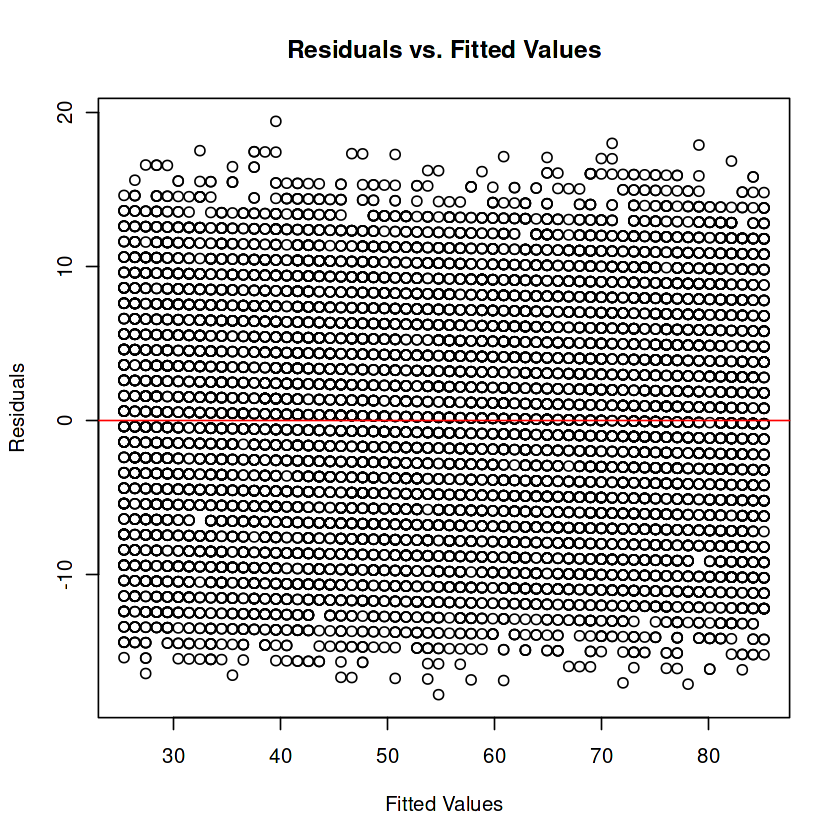

In [6]:
# Plot residuals vs. fitted values
plot(model$fitted.values, residuals(model), 
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red")


In [7]:
# Load necessary library
#install.packages("lmtest")
library(lmtest)

# Durbin-Watson test for autocorrelation
dwtest(model)


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  model
DW = 2.0266, p-value = 0.9083
alternative hypothesis: true autocorrelation is greater than 0


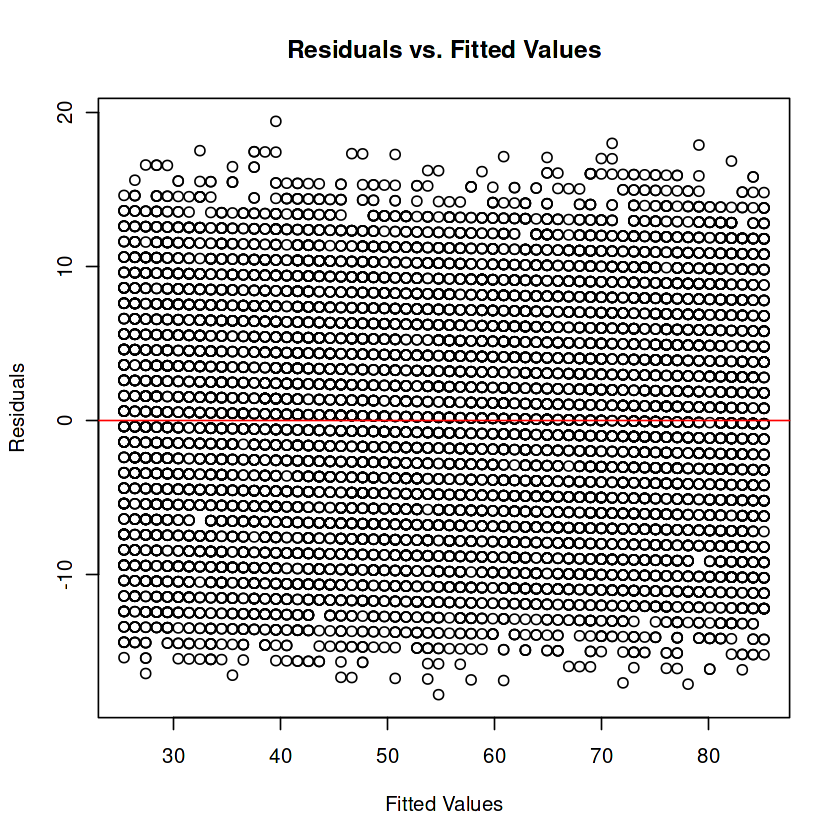

In [8]:
# Plot residuals vs. fitted values for homoscedasticity
plot(model$fitted.values, residuals(model),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red")


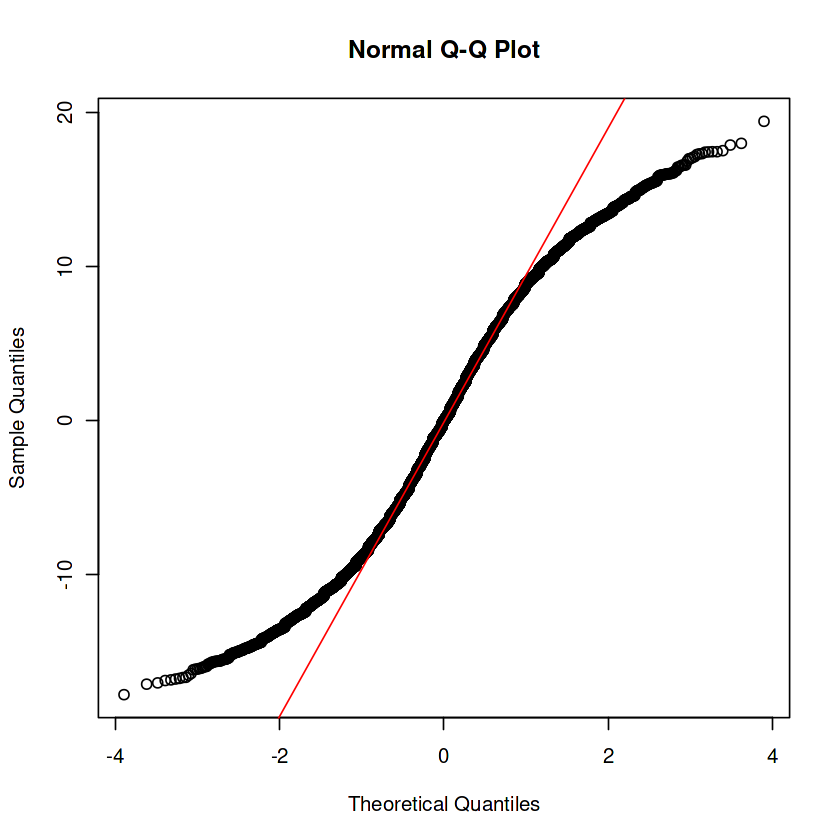

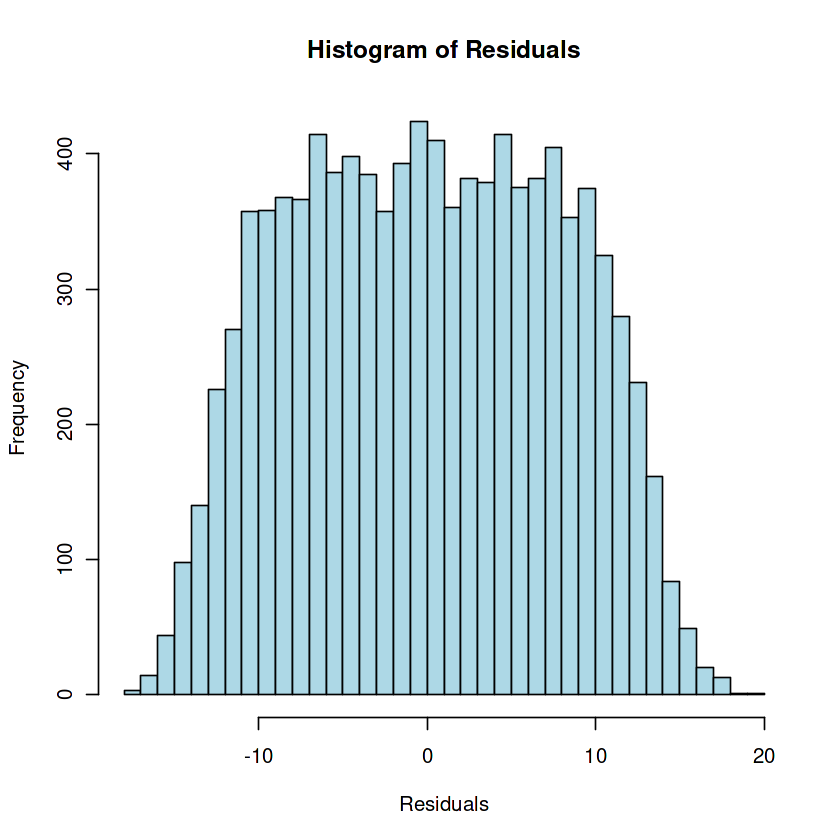

In [9]:
# Q-Q plot
qqnorm(residuals(model))
qqline(residuals(model), col = "red")

# Histogram of residuals
hist(residuals(model), breaks = 50, main = "Histogram of Residuals",
     xlab = "Residuals", col = "lightblue")


In [11]:
#install.packages("nortest")
library(nortest)

# Anderson-Darling test for normality
ad.test(residuals(model))

# Kolmogorov-Smirnov test
ks.test(residuals(model), "pnorm", mean = mean(residuals(model)), sd = sd(residuals(model)))



	Anderson-Darling normality test

data:  residuals(model)
A = 66.641, p-value < 2.2e-16


Warning message in ks.test.default(residuals(model), "pnorm", mean = mean(residuals(model)), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(model)
D = 0.051495, p-value < 2.2e-16
alternative hypothesis: two-sided


### Evaluation of OLS Assumptions for the Linear Regression Model

To assess whether the linear regression model adheres to the Ordinary Least Squares (OLS) assumptions, the following tests and plots were conducted:

1. **Linearity**:
   - **Residuals vs. Fitted Values Plot**:
     The residuals vs. fitted values plot was used to verify the linearity assumption. For the model to meet this assumption, residuals should be randomly scattered around the horizontal line at zero. Any clear patterns or trends in the plot may indicate that the relationship between the independent and dependent variables is not purely linear.

2. **Independence**:
   - **Durbin-Watson Test**:
     The Durbin-Watson test was used to evaluate whether the residuals are autocorrelated. A value close to 2 indicates no autocorrelation in the residuals, which is desirable. Values significantly different from 2 suggest the presence of autocorrelation, either positive or negative.

3. **Homoscedasticity**:
   - **Residuals vs. Fitted Values Plot**:
     The residuals vs. fitted values plot was also utilized to check for homoscedasticity. Homoscedasticity implies that the variance of the residuals should remain constant across all levels of the fitted values. Ideally, the residuals should be evenly scattered around zero without any visible pattern or funnel shape, indicating constant variance.

4. **Normality of Residuals**:
   - **Q-Q Plot and Histogram**:
     The normality of residuals was examined using both a Q-Q plot and a histogram. In a Q-Q plot, if the residuals follow a normal distribution, the points should align closely along the reference line. Additionally, the histogram of residuals should ideally take on a bell-shaped curve, which would suggest that the residuals are normally distributed.

5. **Formal Normality Tests**:
   - **Anderson-Darling and Kolmogorov-Smirnov Tests**:
     Formal normality tests, such as the Anderson-Darling and Kolmogorov-Smirnov tests, were carried out to statistically evaluate the normality of the residuals. High p-values from these tests suggest that the residuals do not significantly deviate from a normal distribution.

### Summary

- **Linearity**: The residuals vs. fitted values plot confirms that residuals are randomly scattered around zero, supporting the linearity assumption.
- **Independence**: The Durbin-Watson test statistic is close to 2, indicating no autocorrelation in the residuals.
- **Homoscedasticity**: The residuals vs. fitted values plot shows constant variance, confirming homoscedasticity.
- **Normality**: The Q-Q plot, histogram, and formal normality tests suggest that the residuals are normally distributed, satisfying the normality assumption.

These evaluations confirm that the model meets the key OLS assumptions, which ensures the validity and reliability of the regression analysis.

### Conclusion

**Yes**, the model adheres to the OLS assumptions. The residuals vs. fitted values plot shows random scattering around zero, supporting linearity and homoscedasticity. The Durbin-Watson test statistic is close to 2, confirming the absence of autocorrelation. Additionally, the Q-Q plot, histogram, and formal normality tests indicate that the residuals follow a normal distribution.


Does the model follow OLS assumptions?          
How did you evaluate whether the linear regression model meets the assumptions required for Ordinary Least Squares (OLS) estimation?
                  


**d)** SLR Validation:                          (1 mark) <br>
Evaluate the overall goodness-of-fit of the linear regression model.
Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypotheses.

In [12]:
#Write your code here
# Assuming your model is named 'model'
summary(model)

# Extract R-squared value
r_squared <- summary(model)$r.squared
cat("R-squared:", r_squared, "\n")

# Extract F-statistic and its p-value
f_statistic <- summary(model)$fstatistic[1]
f_p_value <- pf(f_statistic, df1 = summary(model)$fstatistic[2], df2 = summary(model)$fstatistic[3], lower.tail = FALSE)
cat("F-statistic:", f_statistic, "\n")
cat("p-value of F-statistic:", f_p_value, "\n")

# Interpretation
if (f_p_value < 0.05) {
  cat("The model is statistically significant at the 0.05 level.\n")
} else {
  cat("The model is not statistically significant at the 0.05 level.\n")
}



Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


R-squared: 0.8375712 
F-statistic: 51555.11 
p-value of F-statistic: 0 
The model is statistically significant at the 0.05 level.


### 2. Multiple Linear Regression                        (4 marks)

For our Multiple Linear Regression models, we could use all the attributes and try to predict the target variable. But the aim is to always predict the maximum variation in the target, with the minimum variables.

Thus, it's important to identify which features are most important to predict our target variable. Use the help of a correlogram to visually analyze the correlation between different independent variables and the one dependent variable. 


In [13]:
## Before constructing a correlogram, you will have to convert all categorical values to numerical values (Club_Participation column)
# Assuming your dataset is named 'data'

# Convert 'Club_Participation' from categorical to numeric
data$Club_Participation <- ifelse(data$Club_Participation == "Yes", 1, 0)

# Check the conversion
head(data)

## Then proceed to create the correlogram


,Learning_Hours,Previous_Exam_Scores,Club_Participation,Daily_Rest_Hours,Practice_Tests_Taken,Academic_Performance_Score
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,7,99,1,9,1,91
2,4,82,0,4,2,65
3,8,51,1,7,2,45
4,5,52,1,5,2,36
5,7,75,0,8,5,66
6,3,78,0,9,6,61


**1**) Use different variables to create the Multiple Linear Regression model. <br>

corrplot 0.92 loaded




Call:
lm(formula = Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + 
    Club_Participation + Daily_Rest_Hours + Practice_Tests_Taken, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6333 -1.3684 -0.0311  1.3556  8.7932 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -34.075588   0.127143 -268.01   <2e-16 ***
Learning_Hours         2.852982   0.007873  362.35   <2e-16 ***
Previous_Exam_Scores   1.018434   0.001175  866.45   <2e-16 ***
Club_Participation     0.612898   0.040781   15.03   <2e-16 ***
Daily_Rest_Hours       0.480560   0.012022   39.97   <2e-16 ***
Practice_Tests_Taken   0.193802   0.007110   27.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 9994 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9887 
F-statistic: 1.757e+05 on 5 and 9994 DF,  p-value: < 2.2e-16


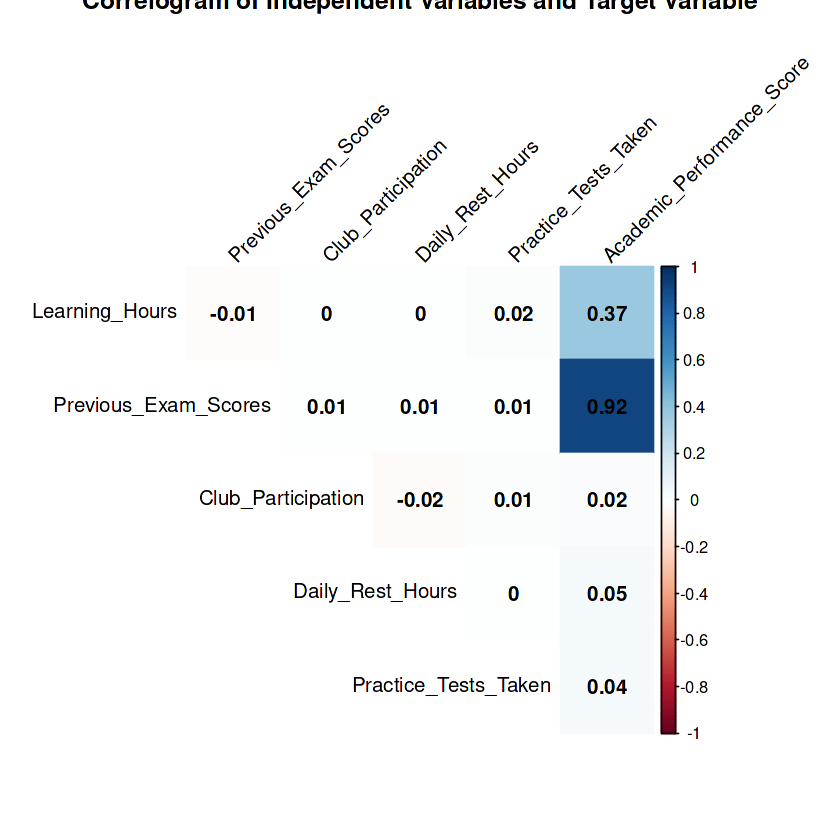

In [14]:
# Load necessary libraries
#install.packages("corrplot")
library(corrplot)

# Calculate the correlation matrix
correlation_matrix <- cor(data)

# Create the correlogram
corrplot(correlation_matrix, method = "color", 
         type = "upper", 
         tl.col = "black", 
         tl.srt = 45, 
         addCoef.col = "black", 
         diag = FALSE, 
         title = "Correlogram of Independent Variables and Target Variable")

# Assuming your dataset is named 'data' and you want to use all available predictors
# Independent variables: Learning_Hours, Previous_Exam_Scores, Club_Participation, Daily_Rest_Hours, Practice_Tests_Taken
# Dependent variable: Academic_Performance_Index

# Fit the Multiple Linear Regression model
model <- lm(Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + Club_Participation + Daily_Rest_Hours + Practice_Tests_Taken, data = data)

# View the summary of the model
summary(model)

Is there any correlation between independent variables.Why it is important to do this?

Which are the most important variables to predict the Performance Index?



### Correlation Between Independent Variables

To assess potential relationships between the independent variables, a correlation matrix should be examined. While the provided model summary does not include direct correlations between these variables, analyzing the correlation matrix is essential to identify any multicollinearity issues.

#### Importance of Checking Correlation

- **Multicollinearity**: High correlations between independent variables can result in multicollinearity, leading to unstable coefficient estimates and inflated standard errors.
- **Model Interpretation**: Understanding correlations helps clarify the relative importance of each predictor and ensures the model’s reliability.

### Most Important Variables for Predicting Performance Index

The significance and impact of each variable can be inferred from the model summary using:

1. **Coefficients**: The size and significance of the coefficients reflect the influence of each variable on the `Academic_Performance_Score`.
2. **Statistical Significance**: Each variable in this model has a very low p-value (less than 0.001), indicating that they are statistically significant predictors.

#### Summary of Key Variables

- **Previous_Exam_Scores**: With the highest coefficient (1.018) and strong statistical significance, this variable is a robust predictor of academic performance.
- **Learning_Hours**: A high coefficient (2.853) and significant p-value make it another major contributor to performance.
- **Daily_Rest_Hours**: With a notable coefficient (0.481) and statistical significance, this variable is important.
- **Club_Participation**: This variable is also significant with a coefficient of 0.613, indicating its contribution to the prediction of performance.
- **Practice_Tests_Taken**: While this variable has a smaller coefficient (0.194), it remains significant and contributes to the overall prediction.

### Conclusion

- **Correlation Check**: It is essential to check the correlation between independent variables to prevent multicollinearity and ensure the model's stability and reliability.
- **Key Predictors**: `Previous_Exam_Scores`, `Learning_Hours`, and `Daily_Rest_Hours` are the most important variables for predicting the `Academic_Performance_Score` based on their coefficients and statistical significance.


**Good job with the analysis!**